# Detecting highest price fluctuations

#### Across the comodities and years, we detect highest fluctuation in modal price in two scenarios:<br><br> 1)  Output the month in a given year for a particular APMC and commodity pair with highest price fluctuation.<br><br>2) Output the APMC for a given commodity in a given year that experiences highest fluctuation.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
dataset = pd.read_csv(r'G:/SocialCops/Monthly_data_cmo_Filtered.csv')

In [3]:
dataset.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar


In [4]:
dataset.date = pd.to_datetime(dataset.date)

In [5]:
dataset.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:bajri
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:bajri
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar


In [6]:
data_2014 = dataset[dataset['Year']==2014]
data_2014.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
706,akole,bajri,2014,December,40,1375,1750,1563,2014-12-01,Ahmadnagar,Maharashtra,akole:bajri
708,akole,paddyunhusked,2014,December,346,1400,1800,1625,2014-12-01,Ahmadnagar,Maharashtra,akole:paddyunhusked
710,akole,wheathusked,2014,December,55,1500,1900,1675,2014-12-01,Ahmadnagar,Maharashtra,akole:wheathusked
713,akole,bhagarvari,2014,December,59,2000,2600,2400,2014-12-01,Ahmadnagar,Maharashtra,akole:bhagarvari
714,akole,gram,2014,December,9,3200,3300,3235,2014-12-01,Ahmadnagar,Maharashtra,akole:gram


In [59]:
import operator
def flucapcom(data_2014, apmc, com):
    diff=pd.DataFrame()
    df_com = data_2014[data_2014['Commodity']==com]
    apcom_fluc={}
    df_apmc=df_com[df_com['APMC']==apmc].copy()
    df_apmc['diff']=df_apmc['max_price']-df_apmc['min_price']
    df_apmc=df_apmc.loc[:,['Month','diff']]
    df_apmc.set_index('Month',inplace=True)
    apcom_fluc=df_apmc['diff'].to_dict()
    ax = sns.barplot(x = list(apcom_fluc.keys()), y = list(apcom_fluc.values()))
    plt.title('Month wise Price Fluctuations for APMC:'+apmc+' and Commodity:'+com)
    plt.xlabel('Month')
    plt.ylabel('Price Fluctuations in year 2014')
    plt.show()
    print('The maximum fluctuation is in the month: '+max(apcom_fluc.items(), key=operator.itemgetter(1))[0])

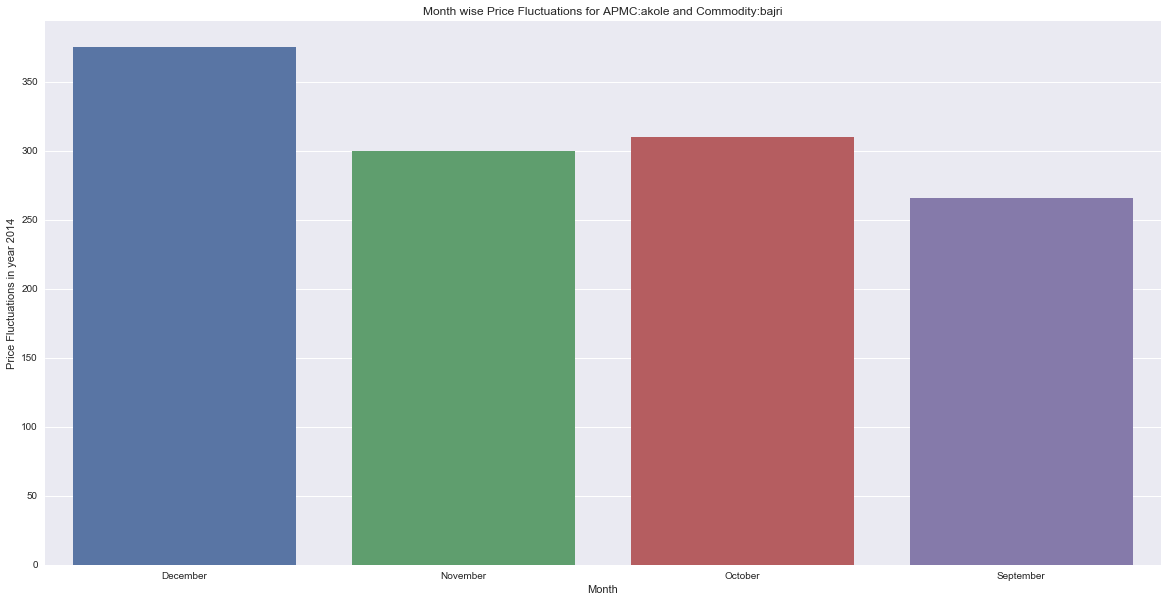

The maximum fluctuation is in the month: December


In [63]:
flucapcom(data_2014, 'akole', 'bajri')

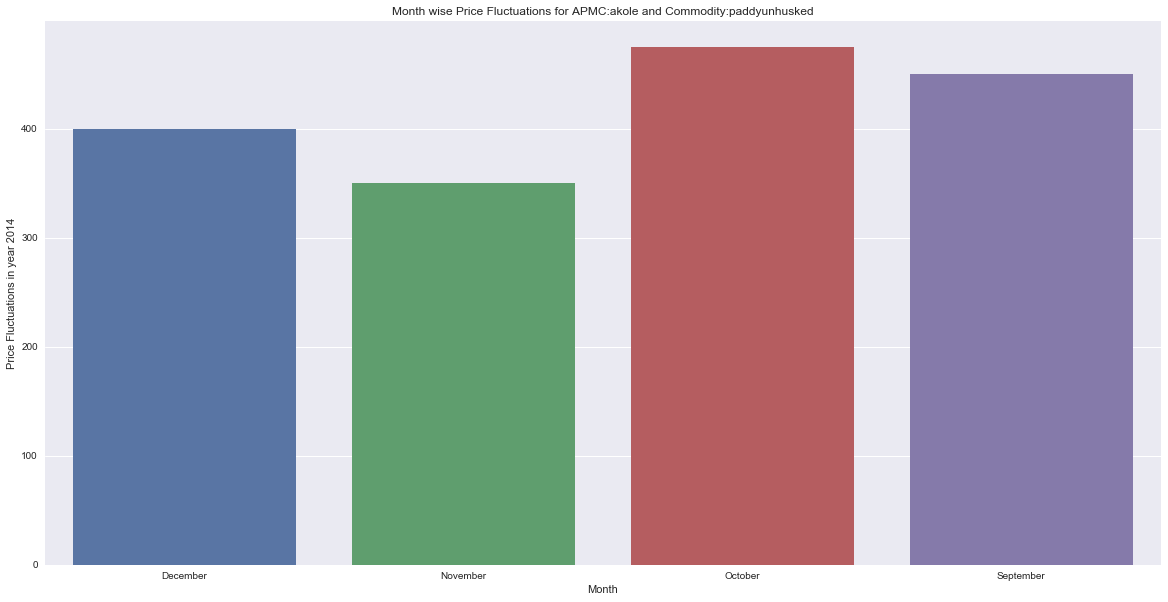

The maximum fluctuation is in the month: October


In [64]:
flucapcom(data_2014, 'akole', 'paddyunhusked')

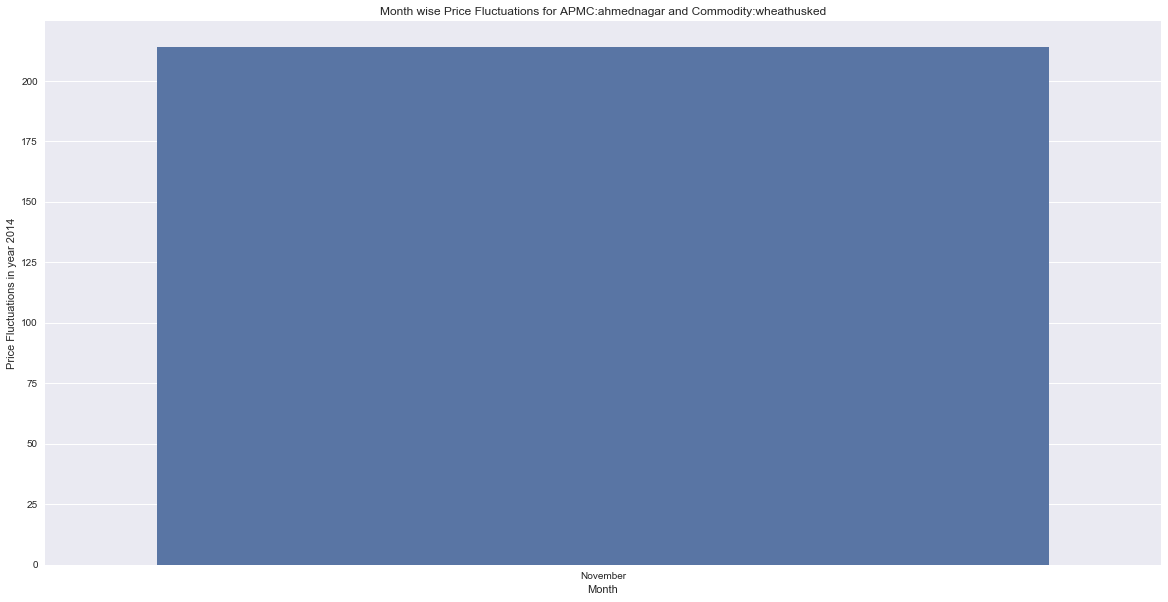

The maximum fluctuation is in the month: November


In [65]:
flucapcom(data_2014, 'ahmednagar', 'wheathusked')

In [58]:
def flucom(data, com):
    diff=pd.DataFrame()
    df_apmc = data[data['Commodity']==com]
    apcom_fluc={}
    df_apmc['diff']=df_apmc['max_price']-df_apmc['min_price']
    df_apmc=df_apmc.loc[:,['APMC','diff']]
    df_apmc=df_apmc.groupby(['APMC']).mean()
    apcom_fluc=df_apmc['diff'].to_dict()
    ax = sns.barplot(x = list(apcom_fluc.keys()), y = list(apcom_fluc.values()))
    plt.title('APMC wise Price Fluctuations for Commodity:'+com)
    plt.xlabel('APMC')
    plt.ylabel('Price Fluctuations in year 2014')
    plt.show()
    print('The maximum fluctuation is in the APMC: '+max(apcom_fluc.items(), key=operator.itemgetter(1))[0])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


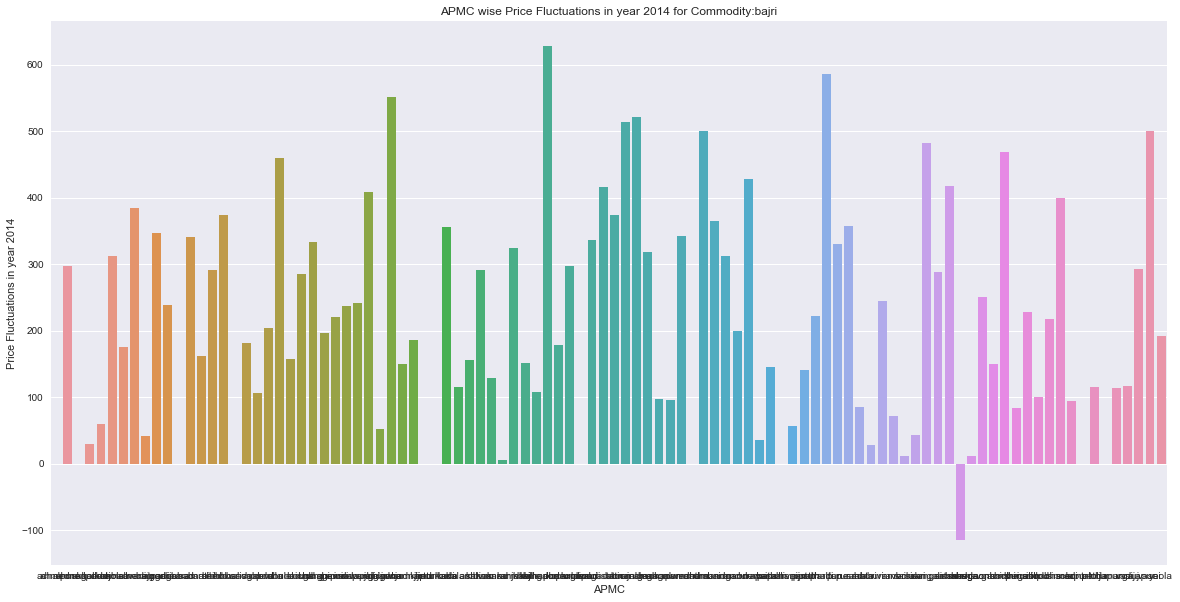

The maximum fluctuation is in the APMC: kille dharur


In [55]:
flucom(data_2014, 'bajri')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


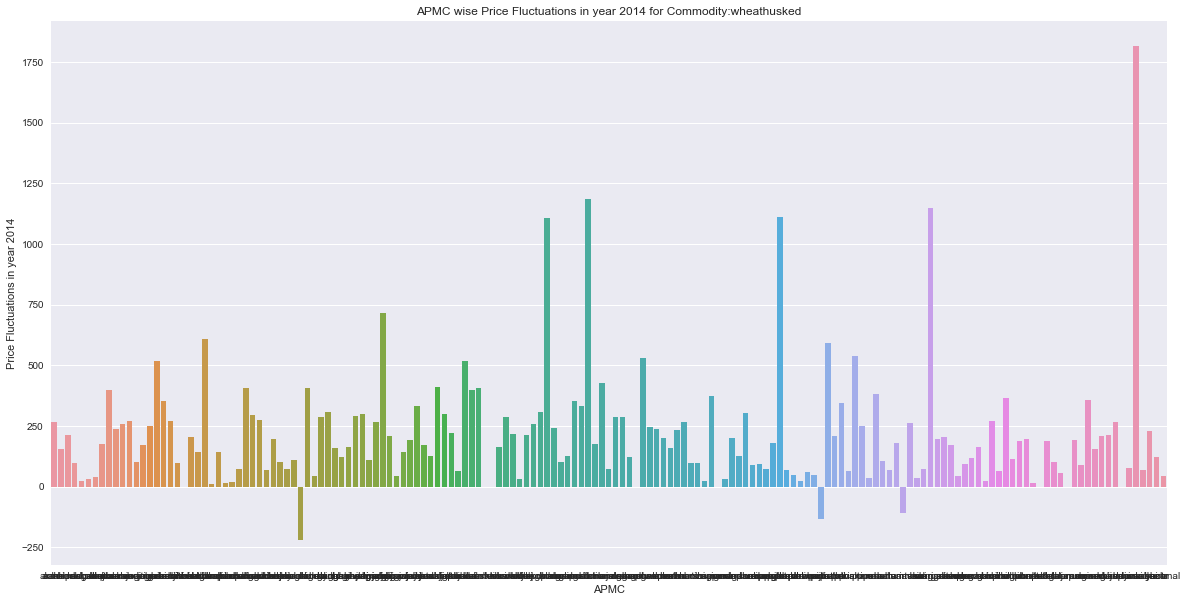

The maximum fluctuation is in the APMC: vasai


In [56]:
flucom(data_2014, 'wheathusked')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


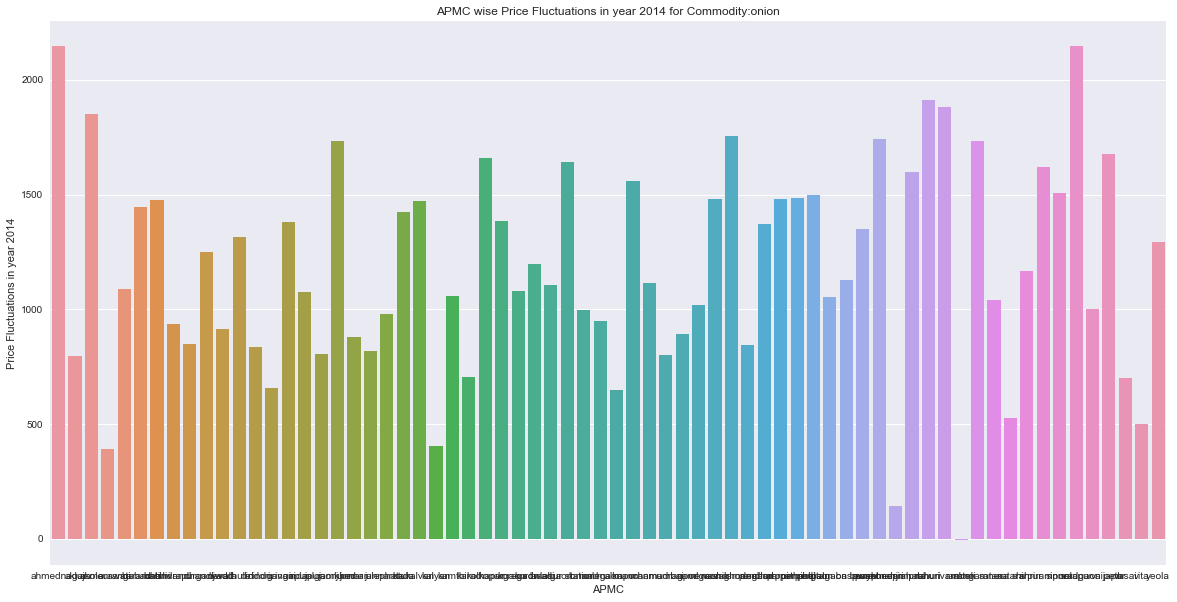

The maximum fluctuation is in the APMC: solapur


In [57]:
flucom(data_2014, 'onion')

In [60]:
data_2015 = dataset[dataset['Year']==2015]
data_2015.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:bajri
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar
6,ahmednagar,maize,2015,April,75,1345,1401,1373,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:maize
8,ahmednagar,gram,2015,April,1794,3533,3762,3647,2015-04-01,Ahmadnagar,Maharashtra,ahmednagar:gram


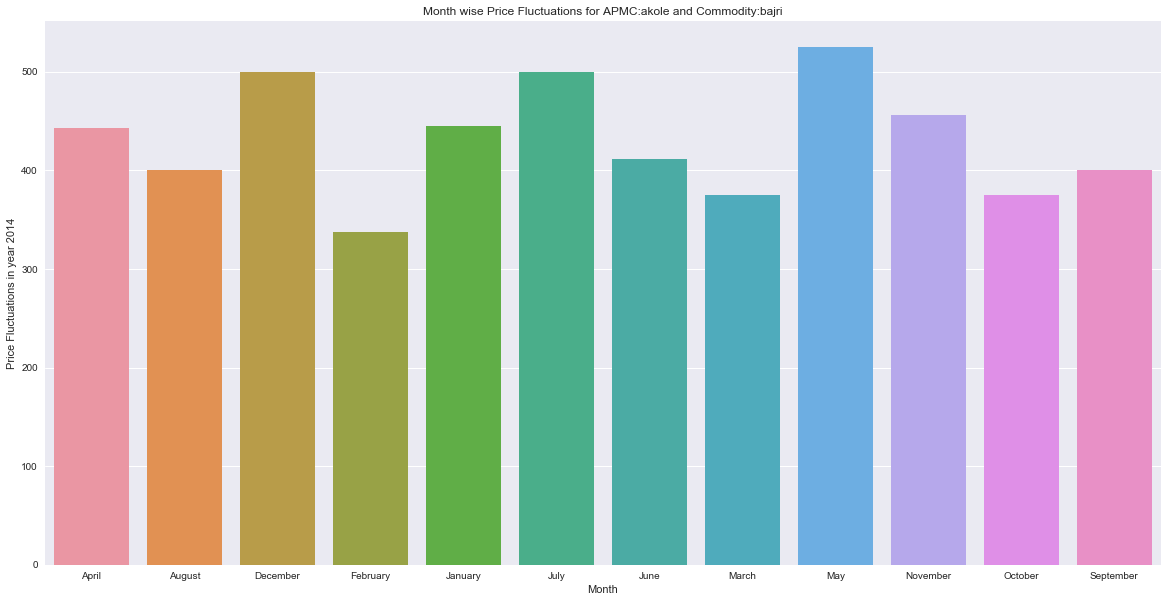

The maximum fluctuation is in the month: May


In [62]:
flucapcom(data_2015, 'akole', 'bajri')

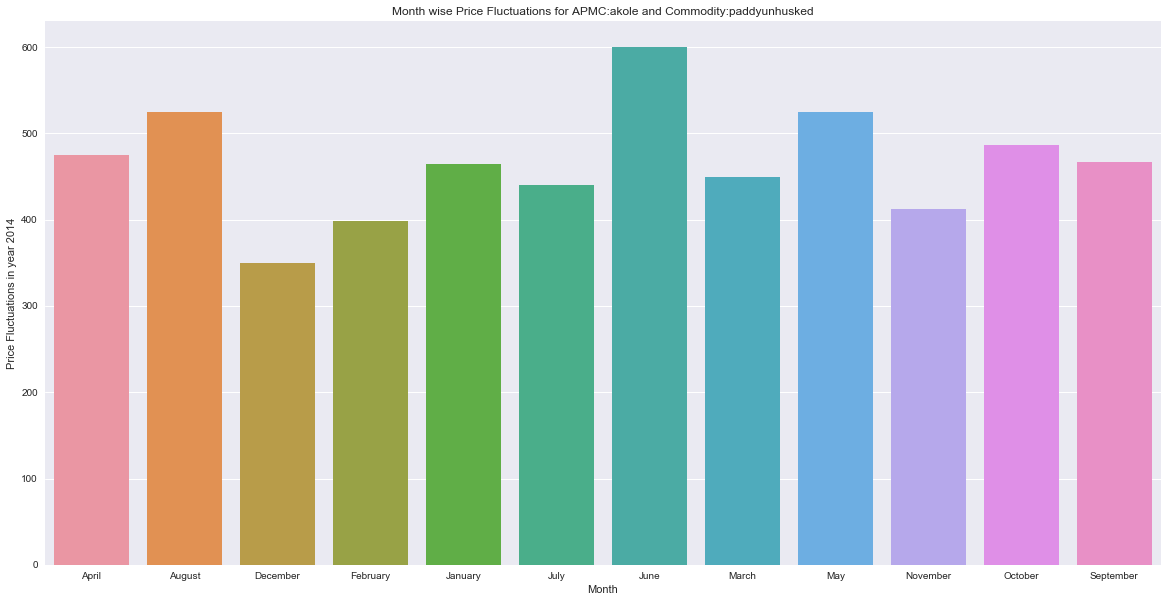

The maximum fluctuation is in the month: June


In [66]:
flucapcom(data_2015, 'akole', 'paddyunhusked')

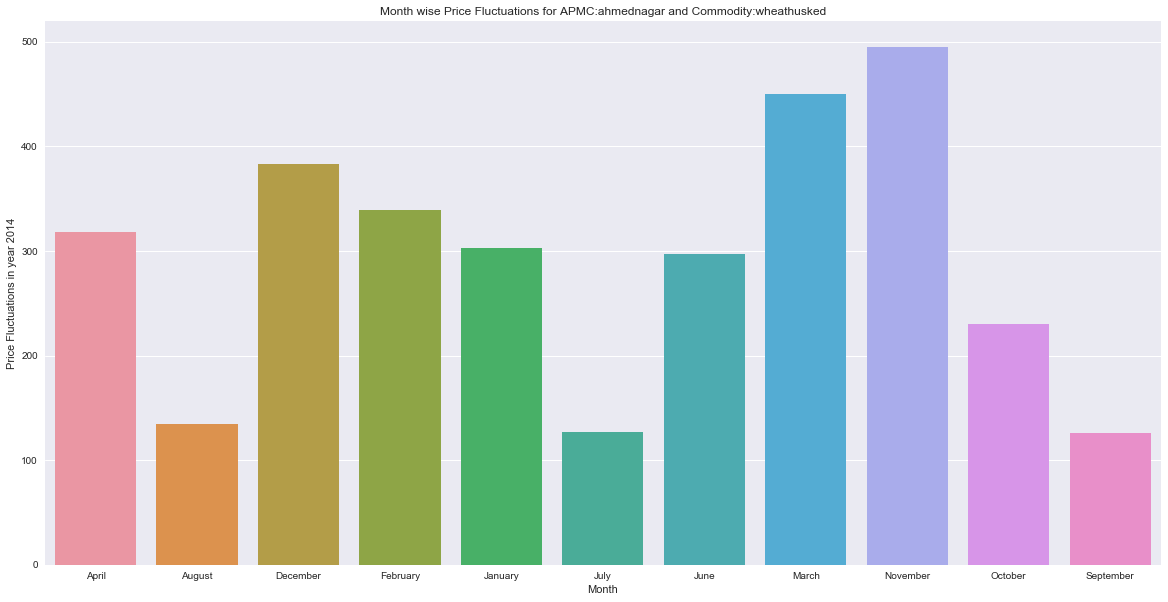

The maximum fluctuation is in the month: November


In [67]:
flucapcom(data_2015, 'ahmednagar', 'wheathusked')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


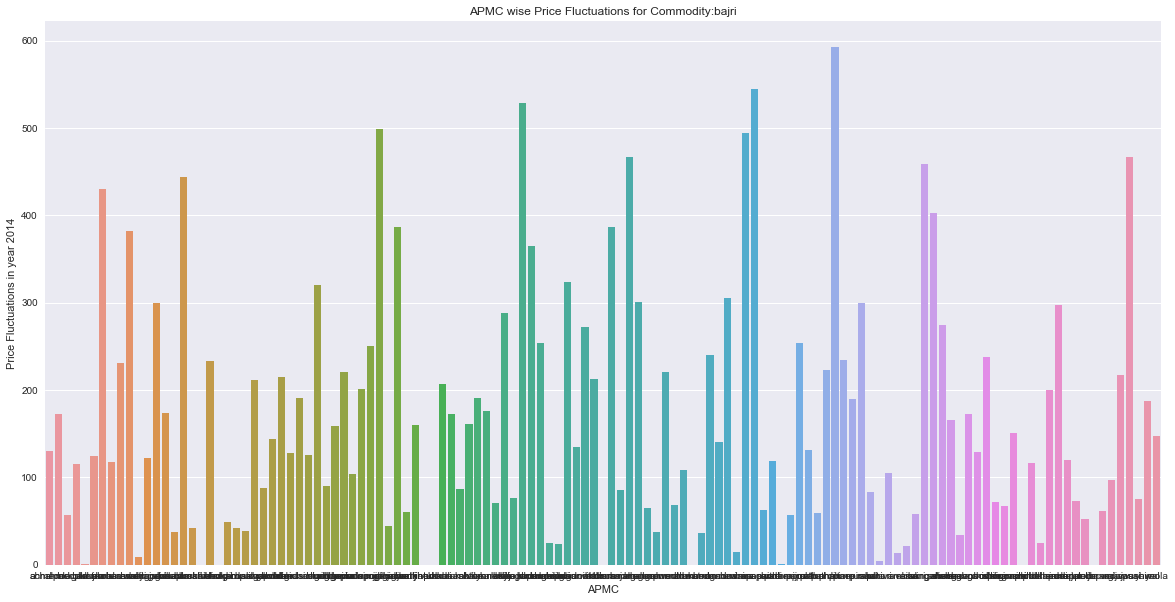

The maximum fluctuation is in the APMC: phaltan


In [68]:
flucom(data_2015, 'bajri')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


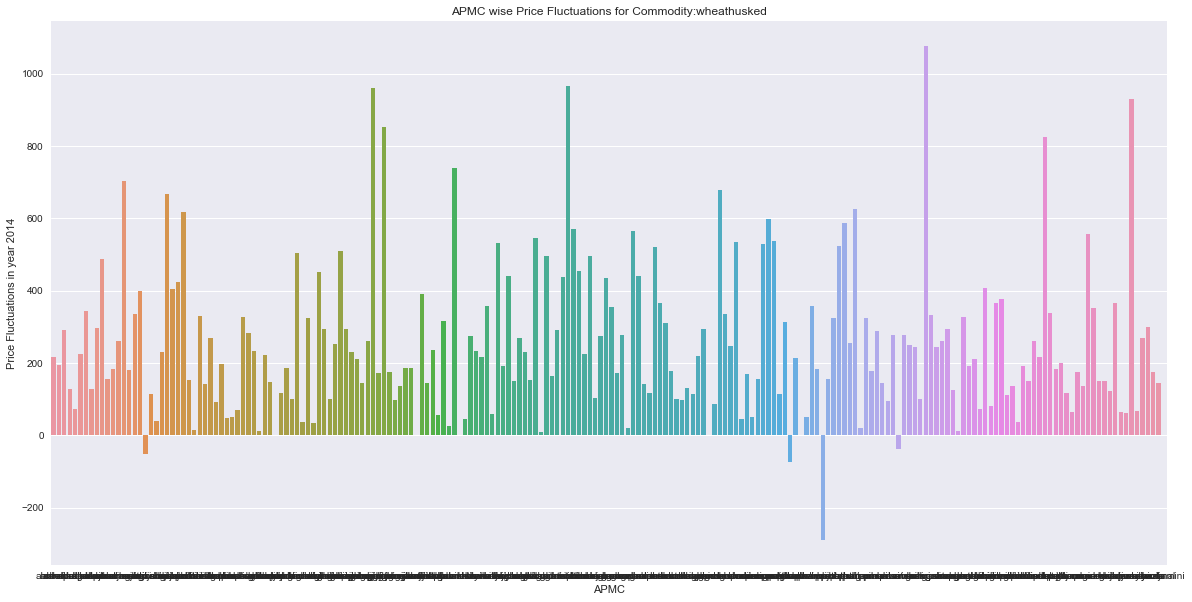

The maximum fluctuation is in the APMC: sangali


In [69]:
flucom(data_2015, 'wheathusked')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


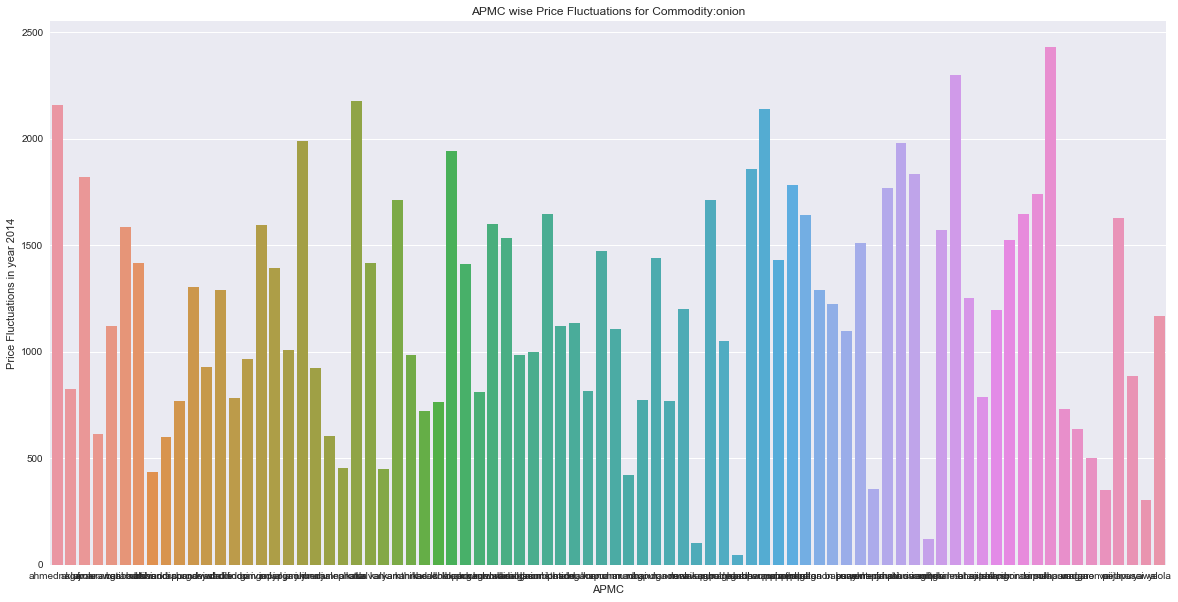

The maximum fluctuation is in the APMC: solapur


In [70]:
flucom(data_2015, 'onion')

In [71]:
data_2016 = dataset[dataset['Year']==2016]
data_2016.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:bajri
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
5,ahmednagar,sorgumjawar,2016,April,2093,1695,2454,2119,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar
7,ahmednagar,maize,2016,April,155,1367,1392,1375,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:maize
9,ahmednagar,gram,2016,April,630,4790,5553,5216,2016-04-01,Ahmadnagar,Maharashtra,ahmednagar:gram


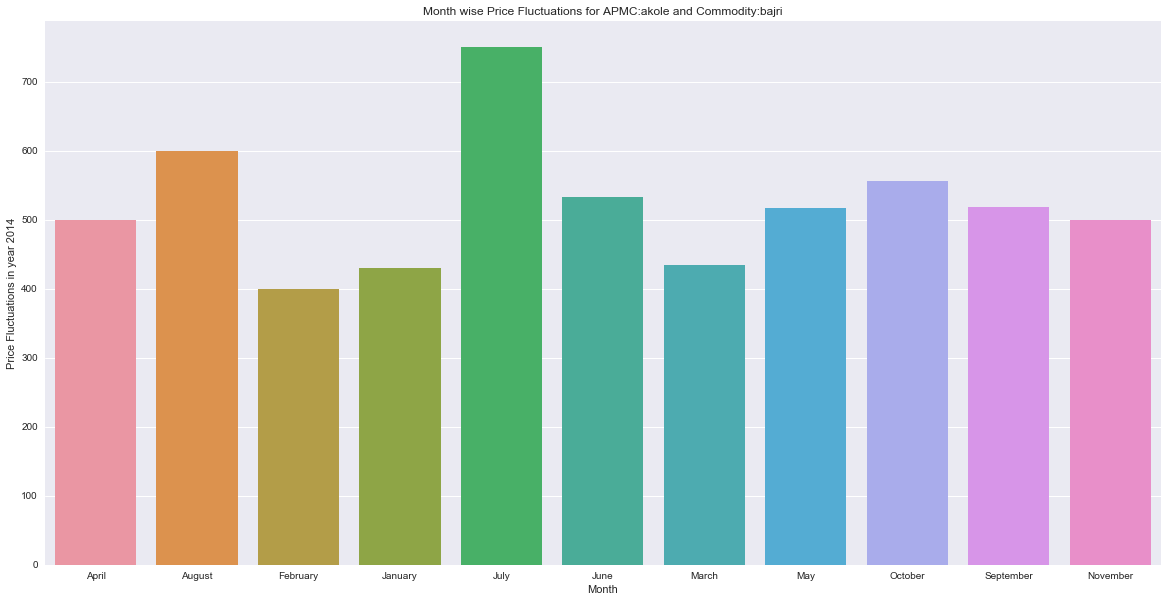

The maximum fluctuation is in the month: July


In [72]:
flucapcom(data_2016, 'akole', 'bajri')

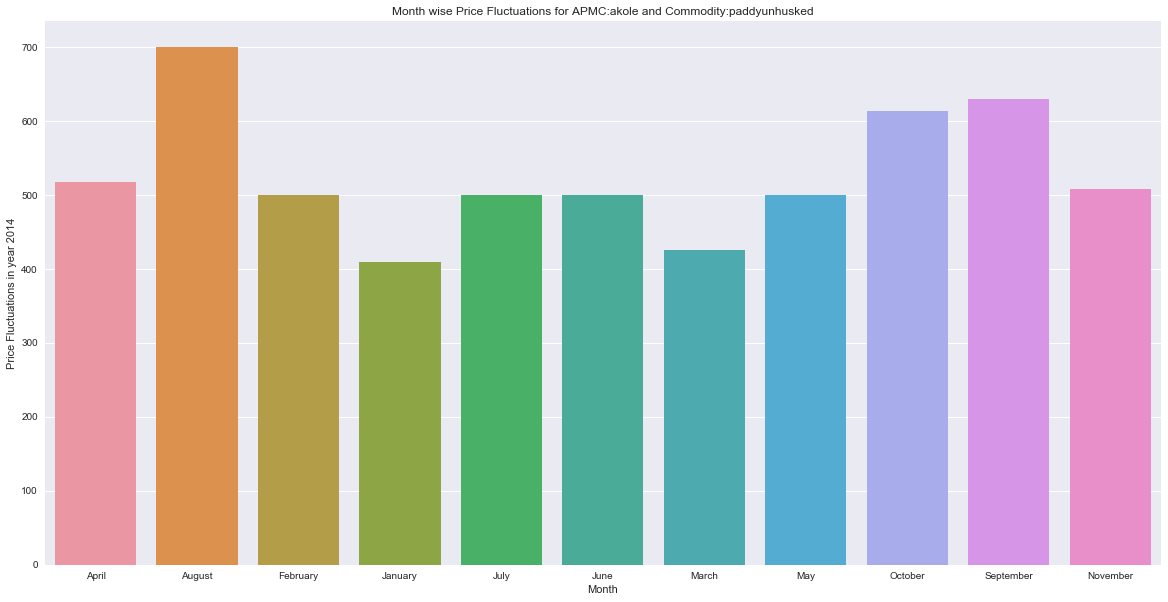

The maximum fluctuation is in the month: August


In [73]:
flucapcom(data_2016, 'akole', 'paddyunhusked')

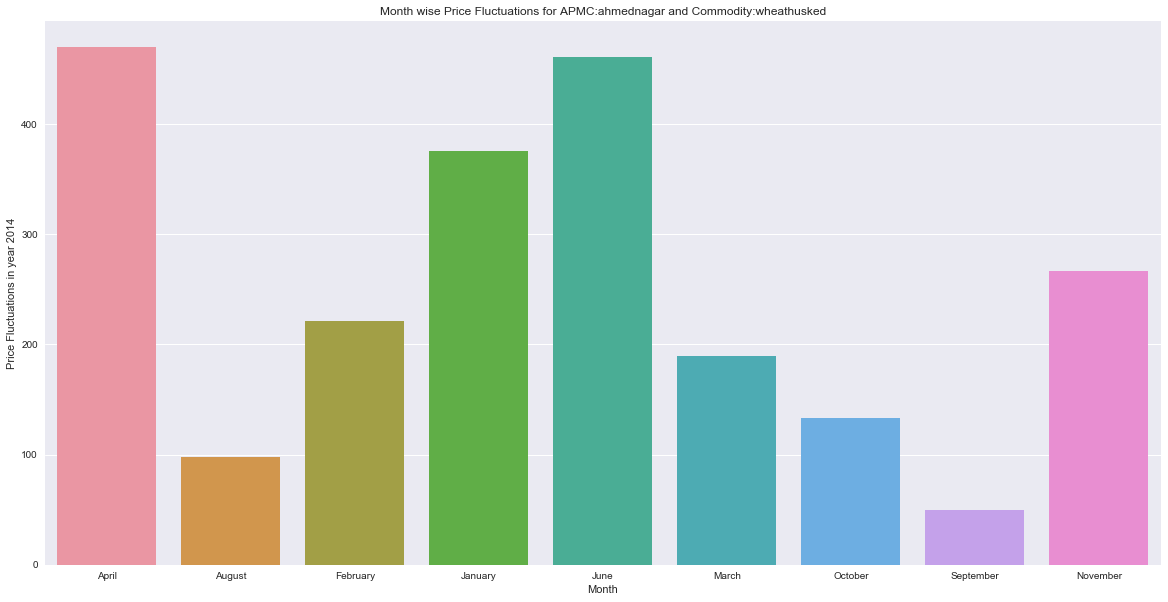

The maximum fluctuation is in the month: April


In [74]:
flucapcom(data_2016, 'ahmednagar', 'wheathusked')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


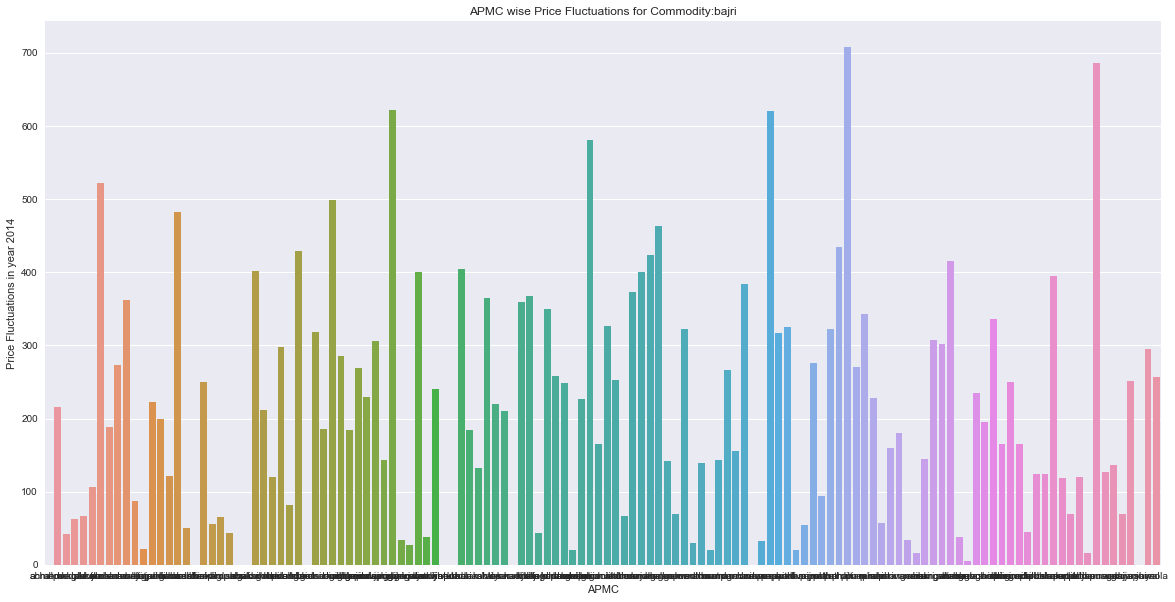

The maximum fluctuation is in the APMC: phaltan


In [75]:
flucom(data_2016, 'bajri')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


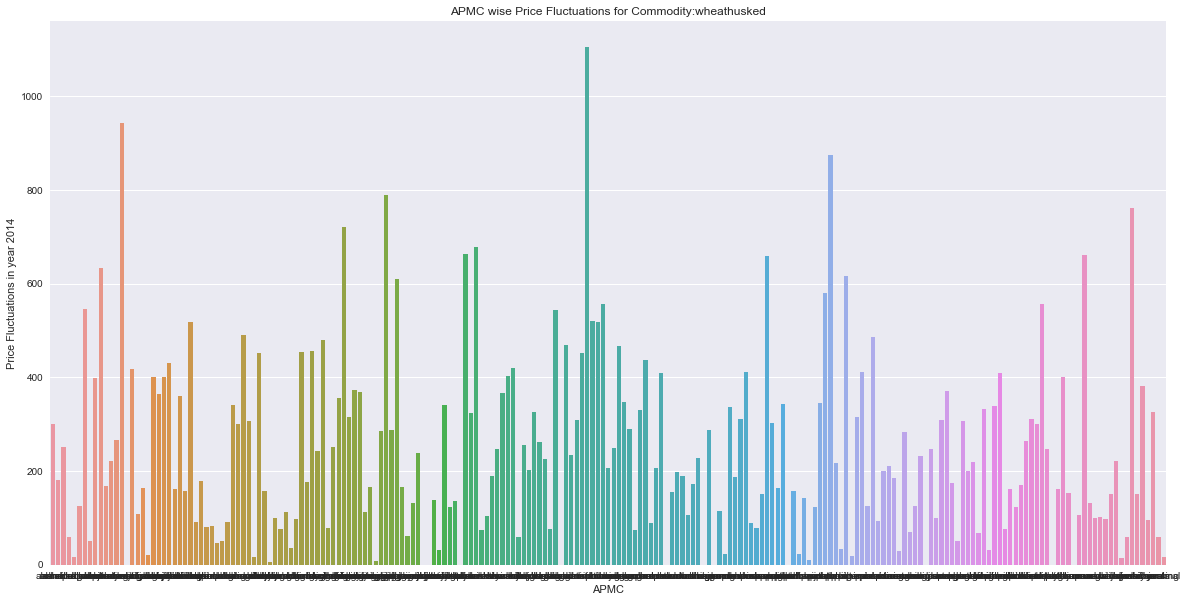

The maximum fluctuation is in the APMC: latur


In [76]:
flucom(data_2016, 'wheathusked')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


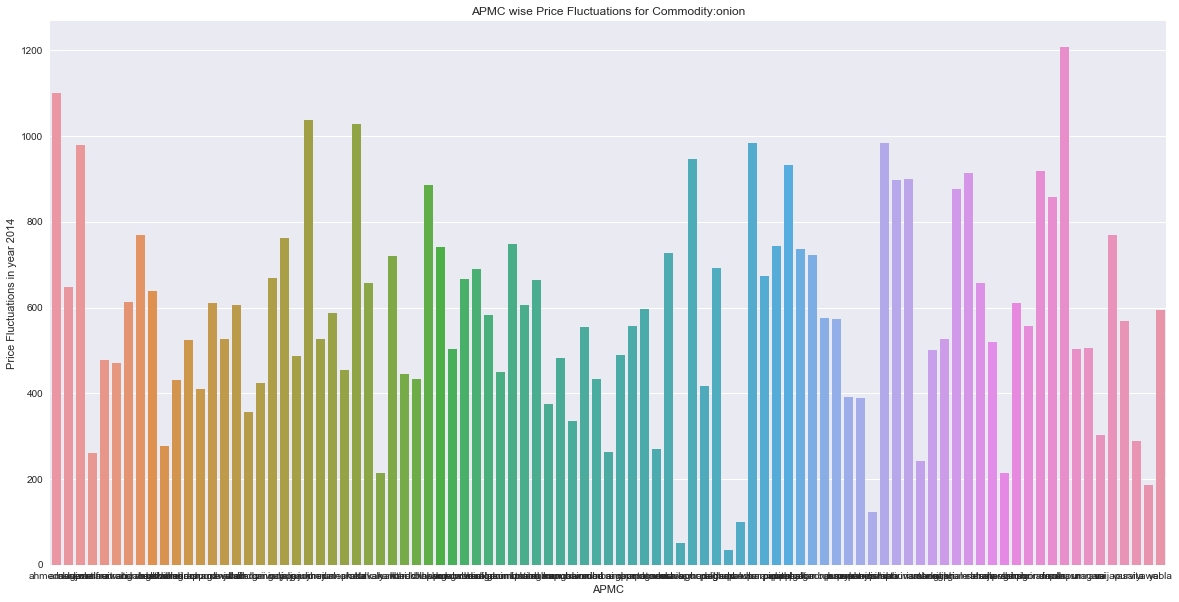

The maximum fluctuation is in the APMC: solapur


In [77]:
flucom(data_2016, 'onion')